利用币安的跨币种保证金策略，利用BTC做空山寨币(市值>2亿美金)，要配置一些没有炒作价值的币
初步执行计划如下：
1. 假设有1万U价值btc，用btc做保证金分成50份每个币分200，再把200分3份每份67U
2. 在fomo大涨后,建首单67U单子,陆续伴随fomo行情开个50个交易对
3. 如果被套超过15-30%,则再加仓67U
4. 最大开到1万价值的仓位,分散在50个交易对

隐藏条件：
1. BTC占整个市场全部价值的比重变化


In [5]:
from pycoingecko import CoinGeckoAPI

def get_market_data():
    cg = CoinGeckoAPI()
    
    # 获取市场总市值数据
    global_data = cg.get_global()
    total_market_cap = global_data['total_market_cap']['usd']

    # 获取 BTC 市值数据
    btc_data = cg.get_coin_by_id('bitcoin')
    btc_market_cap = btc_data['market_data']['market_cap']['usd']

    # 计算 BTC 市值占比
    btc_market_cap_percentage = (btc_market_cap / total_market_cap) * 100
    print(f"BTC 市值占比：{btc_market_cap_percentage:.2f}%")

if __name__ == "__main__":
    get_market_data()


BTC 市值占比：43.98%


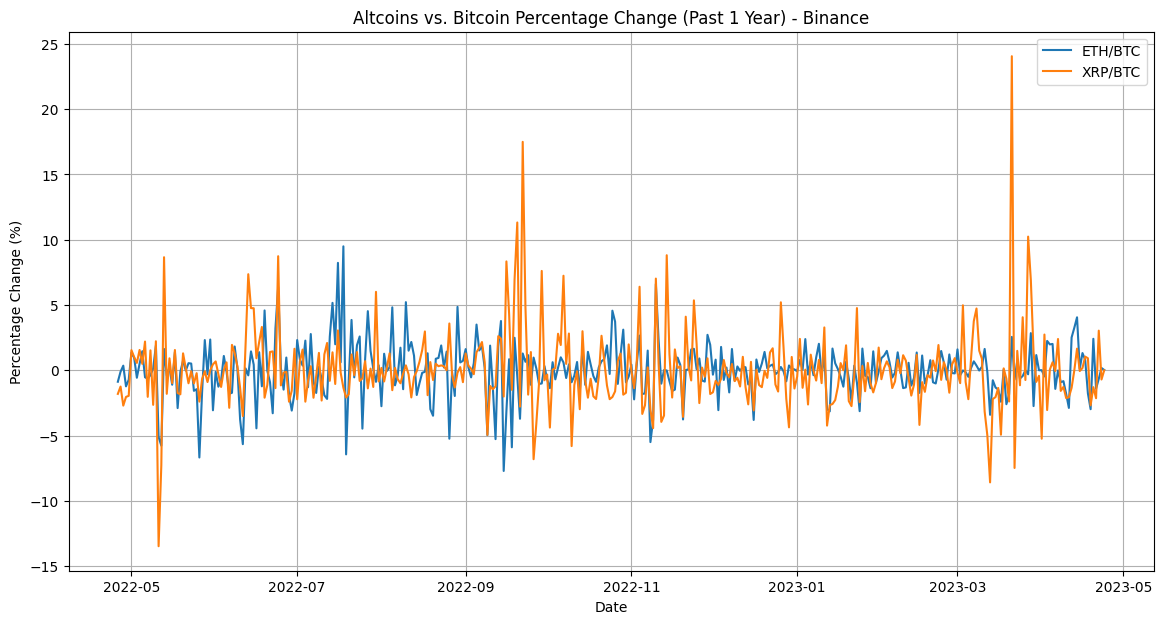

In [8]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

def fetch_ohlcv(exchange, symbol, timeframe):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
    return pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

def plot_percentage_trends():
    exchange = ccxt.binance()

    # 获取过去一年的数据
    now = exchange.milliseconds()
    year_ago = now - 365 * 24 * 60 * 60 * 1000
    timeframe = '1d'

    # 获取以太坊 (ETH) 相对于比特币 (BTC) 的价格走势
    eth_prices = fetch_ohlcv(exchange, 'ETH/BTC', timeframe)
    eth_prices = eth_prices[eth_prices['timestamp'] >= year_ago]
    eth_prices['timestamp'] = pd.to_datetime(eth_prices['timestamp'], unit='ms')

    # 获取瑞波币 (XRP) 相对于比特币 (BTC) 的价格走势
    xrp_prices = fetch_ohlcv(exchange, 'XRP/BTC', timeframe)
    xrp_prices = xrp_prices[xrp_prices['timestamp'] >= year_ago]
    xrp_prices['timestamp'] = pd.to_datetime(xrp_prices['timestamp'], unit='ms')

    # 计算价格百分比变化
    eth_prices['percentage_change'] = eth_prices['close'].pct_change() * 100
    xrp_prices['percentage_change'] = xrp_prices['close'].pct_change() * 100

    # 绘制价格走势图
    plt.figure(figsize=(14, 7))
    plt.plot(eth_prices['timestamp'], eth_prices['percentage_change'], label='ETH/BTC')
    plt.plot(xrp_prices['timestamp'], xrp_prices['percentage_change'], label='XRP/BTC')

    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.title('Altcoins vs. Bitcoin Percentage Change (Past 1 Year) - Binance')
    plt.legend()
    plt.grid()

    plt.show()

if __name__ == "__main__":
    plot_percentage_trends()


In [10]:
from pycoingecko import CoinGeckoAPI

def get_altcoins_with_market_cap_above(cap_usd):
    cg = CoinGeckoAPI()

    # 获取加密货币市场数据
    market_data = cg.get_coins_markets(vs_currency='usd')

    # 稳定币列表
    stablecoins = ['usdt', 'usdc', 'busd', 'dai', 'sai', 'pax', 'gusd', 'tusd', 'husd']

    # 筛选市值大于 cap_usd 且非稳定币的山寨币
    filtered_altcoins = [coin for coin in market_data if coin['market_cap'] > cap_usd and coin['symbol'] != 'btc' and coin['symbol'] not in stablecoins]

    return filtered_altcoins

if __name__ == "__main__":
    market_cap_threshold = 2e8  # 2亿美元
    altcoins = get_altcoins_with_market_cap_above(market_cap_threshold)

    print(f"市值超过 {market_cap_threshold} 美元的非稳定币山寨币：")
    for altcoin in altcoins:
        print(f"{altcoin['name']} (Symbol: {altcoin['symbol'].upper()}) - Market Cap: ${altcoin['market_cap']:,}")


市值超过 200000000.0 美元的非稳定币山寨币：
Ethereum (Symbol: ETH) - Market Cap: $221,774,406,643
BNB (Symbol: BNB) - Market Cap: $52,057,557,826
XRP (Symbol: XRP) - Market Cap: $23,776,323,460
Cardano (Symbol: ADA) - Market Cap: $13,577,009,745
Lido Staked Ether (Symbol: STETH) - Market Cap: $11,296,608,277
Dogecoin (Symbol: DOGE) - Market Cap: $10,939,295,435
Polygon (Symbol: MATIC) - Market Cap: $9,131,811,456
Solana (Symbol: SOL) - Market Cap: $8,409,750,763
Polkadot (Symbol: DOT) - Market Cap: $7,190,933,013
Litecoin (Symbol: LTC) - Market Cap: $6,353,728,730
Shiba Inu (Symbol: SHIB) - Market Cap: $6,069,005,048
TRON (Symbol: TRX) - Market Cap: $5,997,526,585
Avalanche (Symbol: AVAX) - Market Cap: $5,533,651,141
Wrapped Bitcoin (Symbol: WBTC) - Market Cap: $4,206,219,034
Uniswap (Symbol: UNI) - Market Cap: $4,062,399,852
Chainlink (Symbol: LINK) - Market Cap: $3,682,906,366
Toncoin (Symbol: TON) - Market Cap: $3,355,691,392
LEO Token (Symbol: LEO) - Market Cap: $3,256,653,500
Cosmos Hub (Symbol: